In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

/home/apk/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
eeg=h5py.File("a_2019.01.04_12.09.25.hdf5",mode='r')
keys2= list(eeg.keys())
print keys2
keys1= list(eeg[keys2[0]].keys())
print keys1
#print eeg[keys2[0]][keys1[0]]
#eeg["RawData"]['Samples']
print list(eeg['RawData'].keys())
print eeg['RawData']['Samples']
sampletime = np.array(eeg['AsynchronData']["Time"])
time=sampletime/256.0
print sampletime

[u'AsynchronData', u'RawData', u'SavedFeatues', u'Version']
[u'AsynchronSignalTypes', u'Time', u'TypeID', u'Value']
[u'AcquisitionTaskDescription', u'DAQDeviceCapabilities', u'DAQDeviceDescription', u'Samples', u'SessionDescription', u'SubjectDescription']
<HDF5 dataset "Samples": shape (44370, 64), type "<f4">
[[12616]
 [43481]]


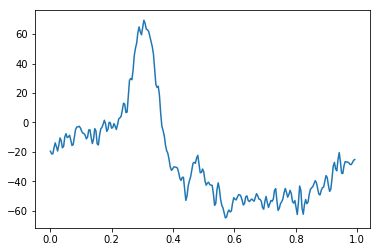

In [4]:
samples=np.array(eeg["RawData"]['Samples'])
samples=samples.T
#print samples
plt.plot(np.arange(9341-9086)/256.0,samples[1][9086:9341])

In [3]:
value=np.array(eeg['RawData']['DAQDeviceCapabilities'])
print value

['<?xml version="1.0" encoding="utf-8" ?>\n<DAQDeviceCapabilities xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">\n  <AnalogChannelProperties>\n    <ChannelProperties>\n      <SensitivityLowValue>-250000</SensitivityLowValue>\n      <SensitivityHighValue>250000</SensitivityHighValue>\n      <SampleRate>256</SampleRate>\n      <Offset>0</Offset>\n      <NotchFilter>50</NotchFilter>\n      <HighpassFilter>0.1</HighpassFilter>\n      <LowpassFilter>60</LowpassFilter>\n      <IsBipolar>true</IsBipolar>\n      <IsTriggerChannel>false</IsTriggerChannel>\n      <DeviceNumber>1</DeviceNumber>\n      <DeviceName>HA-2015.08.03</DeviceName>\n      <LogicalChannelNumber>1</LogicalChannelNumber>\n      <PhysicalChannelNumber>1</PhysicalChannelNumber>\n      <ChannelType />\n      <ChannelName />\n      <ChannelColoring>\n        <PenColor>0</PenColor>\n        <PaperColor>0</PaperColor>\n      </ChannelColoring>\n    </ChannelProperties>\n    <Cha

In [4]:
import xml.etree.ElementTree as ET
root = ET.fromstring(value[0])

[elem.tag for elem in root.iter()]
print(ET.tostring(root, encoding='utf8').decode('utf8'))


<?xml version='1.0' encoding='utf8'?>
<DAQDeviceCapabilities>
  <AnalogChannelProperties>
    <ChannelProperties>
      <SensitivityLowValue>-250000</SensitivityLowValue>
      <SensitivityHighValue>250000</SensitivityHighValue>
      <SampleRate>256</SampleRate>
      <Offset>0</Offset>
      <NotchFilter>50</NotchFilter>
      <HighpassFilter>0.1</HighpassFilter>
      <LowpassFilter>60</LowpassFilter>
      <IsBipolar>true</IsBipolar>
      <IsTriggerChannel>false</IsTriggerChannel>
      <DeviceNumber>1</DeviceNumber>
      <DeviceName>HA-2015.08.03</DeviceName>
      <LogicalChannelNumber>1</LogicalChannelNumber>
      <PhysicalChannelNumber>1</PhysicalChannelNumber>
      <ChannelType />
      <ChannelName />
      <ChannelColoring>
        <PenColor>0</PenColor>
        <PaperColor>0</PaperColor>
      </ChannelColoring>
    </ChannelProperties>
    <ChannelProperties>
      <SensitivityLowValue>-250000</SensitivityLowValue>
      <SensitivityHighValue>250000</SensitivityHighVal

In [7]:
import scipy.signal as signal

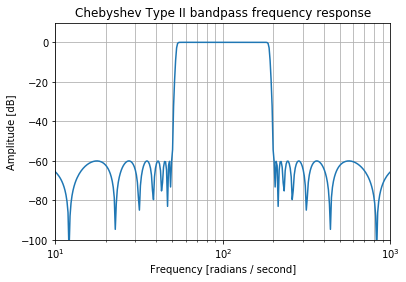

In [8]:
b, a = signal.iirfilter(17, [50, 200], rs=60, btype='band',
...                         analog=True, ftype='cheby2')
w, h = signal.freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_xscale('log')
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [radians / second]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [9]:
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

[35.4921875]
[36.48828125]


/home/apk/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'numpy.ndarray'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


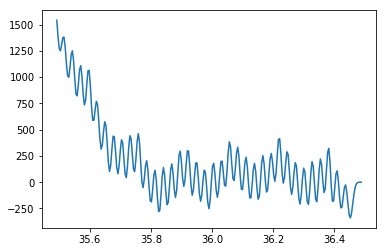

In [19]:
print sampletime[0]/256.0
print sampletime[1]/256.0
t = np.linspace(sampletime[0]/256.0, sampletime[1]/256.0, sampletime[1]-sampletime[0])
#t = np.linspace(0,len(samples[0])/256.0, len(samples[0])-0)
lowcut=0.5
highcut=40
fs=256
order=8
#xlow = np.sin(2 * np.pi * 5 * t)
#xhigh = np.sin(2 * np.pi * 250 * t)
x = samples[63][9086:9341]
b, a = butter_bandpass(lowcut, highcut, fs, order=order)
y = signal.filtfilt(b, a, x, padlen=0)
plt.plot(t,y)

In [84]:
mu=np.mean(y)
sigsq=np.mean((y-mu)**2)
print sigsq, mu

391.3041062831781 -0.46473310674721335


In [43]:
rms=np.sqrt(np.mean(y**2))
print rms

2.5621190196353893


In [44]:
mav=np.mean(np.abs(y))
print mav

2.00196410733536


In [79]:
rmserr=[]
for i in range(0,64):
    x = samples[i][9086:9341]
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, x, padlen=0)
    rmserr.append(np.sqrt(np.mean(y**2)))
    if rmserr[i]>10:
        print i
    

2
18
28
63


In [18]:
import pywt